In [1]:
import matplotlib.pyplot as plt
import tools.dataTools as dt
from constants import Constants
import figure_params
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from textwrap import wrap
import pyaldata as pyal

figure_params.set_rc_params()
figure_params.setup_directories()

SUBFIG_DIR = Constants.FIG_FOLDER + 'figS1_example_comparisons/'
if not os.path.exists(SUBFIG_DIR):
    os.makedirs(SUBFIG_DIR)

#run simulations for figure, will take a while to run
# import subprocess
# os.chdir(Constants.PROJ_DIR)
# subprocess.run(["bash", "simulation/fig_simulations/fig2_sims.sh"]) #uncomment code to make datasets if not made yet

import warnings
warnings.filterwarnings("ignore")

In [2]:
seeds = Constants.SEEDS
repertoires  = Constants.UNIS
reps = Constants.UNIS

#### Calculate comparison measures

In [3]:
sim_set = 'uni_rad'
datafile = 'uni_10.0_rad'
seed = 1000003

### Example Traces

In [4]:
# get data 
prep_exec_df1 = dt.get_pyaldata(sim_set, seed, repertoires[0], epoch_fun = Constants.prep_exec_epoch, subtract_mean=False, datafile = datafile)
prep_exec_df1 = dt.perform_pca(prep_exec_df1, pca_dims = 10)

prep_exec_df2 = dt.get_pyaldata(sim_set, seed, repertoires[1], epoch_fun = Constants.prep_exec_epoch, subtract_mean=False, datafile = datafile)
prep_exec_df2 = dt.perform_pca(prep_exec_df2, pca_dims = 10)

exec_df1 = dt.get_pyaldata(sim_set, seed, repertoires[0], epoch_fun = Constants.exec_epoch, subtract_mean=False, datafile = datafile)
exec_df2 = dt.get_pyaldata(sim_set, seed, repertoires[1], epoch_fun = Constants.exec_epoch,subtract_mean=False, datafile = datafile)

exec_df_noise1 = dt.get_pyaldata(sim_set, seed, repertoires[0], epoch_fun = Constants.exec_epoch, subtract_mean=False, datafile = datafile, noise=1.0)
exec_df_noise2 = dt.get_pyaldata(sim_set, seed, repertoires[1], epoch_fun = Constants.exec_epoch, subtract_mean=False, datafile = datafile, noise=1.0)

#calculate distances between timesteps (for normalization of latent spaces)
av_df1 = pyal.trial_average(prep_exec_df1, 'target_param')
dist_tsteps1 = np.linalg.norm(np.diff(av_df1.both_pca.values.tolist(), axis = 1),axis = 2)
av_df2 = pyal.trial_average(prep_exec_df2, 'target_param')
dist_tsteps2 = np.linalg.norm(np.diff(av_df2.both_pca.values.tolist(), axis = 1),axis = 2)

#get unit and latent activity, position, and xvel with noise
rates1 = prep_exec_df1.MCx_rates.values
rates2 = prep_exec_df2.MCx_rates.values
pca1 = prep_exec_df1.both_pca.values/np.median(dist_tsteps1)
pca2 = prep_exec_df2.both_pca.values/np.median(dist_tsteps1)
pos1 = exec_df1.pos.values
pos2 = exec_df2.pos.values
xvels1 = (np.diff(np.array(exec_df_noise1.pos.tolist())[:,:,0], axis =1)/Constants.BIN_SIZE)
xvels2 = (np.diff(np.array(exec_df_noise2.pos.tolist())[:,:,0], axis =1)/Constants.BIN_SIZE)

#get variance for unit and latent activity, and position
var_rates1 = np.var(rates1, axis = 0)
var_rates2 = np.var(rates2, axis = 0)
var_pca1 = np.var(pca1, axis = 0)
var_pca2 = np.var(pca2, axis = 0)
var_pos1 = np.var(pos1, axis = 0)
var_pos2 = np.var(pos2, axis = 0)

#### Unit activity

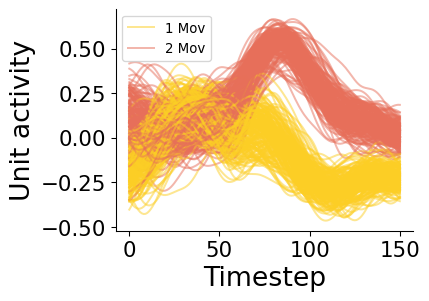

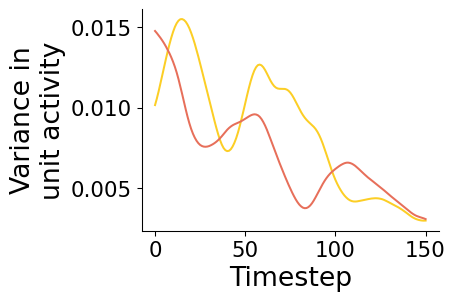

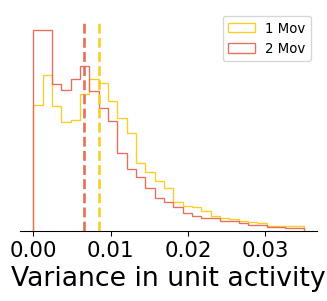

In [5]:
# #rates per neuron
i = 6
plt.figure()
for j in range(len(rates1)):
    plt.plot(rates1[j][:,i], c = Constants.REPERTOIRE_COLORS[0],alpha = 0.5)
    plt.plot(rates2[j][:,i], c = Constants.REPERTOIRE_COLORS[1],alpha = 0.5)
plt.xlabel('Timestep')
plt.ylabel('Unit activity')
plt.legend(['1 Mov', '2 Mov'])
plt.savefig(SUBFIG_DIR + 'unit_activity_ex_neuron.pdf', format = 'pdf', bbox_inches = 'tight')

#var rates over trials
plt.figure()
plt.plot(var_rates1[:,i],c = Constants.REPERTOIRE_COLORS[0])
plt.plot(var_rates2[:,i],c = Constants.REPERTOIRE_COLORS[1])
plt.xlabel('Timestep')
plt.ylabel("\n".join(wrap('Variance in unit activity',15)))
plt.savefig(SUBFIG_DIR + 'unit_activity_ex_var.pdf', format = 'pdf', bbox_inches = 'tight')

#var rates hist
plt.figure()
bins = np.linspace(0,0.035,30)
plt.hist(var_rates1.flatten(), histtype='step',bins = bins, color = Constants.REPERTOIRE_COLORS[0])
plt.hist(var_rates2.flatten(), histtype='step',bins = bins, color = Constants.REPERTOIRE_COLORS[1])
plt.xlabel('Variance in unit activity')
plt.legend(['1 Mov', '2 Mov'])
ymin, ymax = plt.gca().get_ylim()
# plt.vlines([np.mean(var_rates1.flatten())], 0, ymax, color = Constants.REPERTOIRE_COLORS[0], linestyles = ['solid'])
plt.vlines([np.median(var_rates1.flatten())], 0, ymax, color = Constants.REPERTOIRE_COLORS[0], linestyles = ['dashed'], linewidth = 2)
# plt.vlines([np.mean(var_rates2.flatten())], 0, ymax, color = Constants.REPERTOIRE_COLORS[1], linestyles = ['solid'])
plt.vlines([np.median(var_rates2.flatten())], 0, ymax, color = Constants.REPERTOIRE_COLORS[1], linestyles = ['dashed'], linewidth = 2)
# plt.legend(['1 Mov', '2 Mov', 'median', 'mean'])
plt.legend(['1 Mov', '2 Mov'])
plt.gca().spines['left'].set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig(SUBFIG_DIR + 'unit_activity_ex_histogram.pdf', format = 'pdf', bbox_inches = 'tight')



#### Latent activity

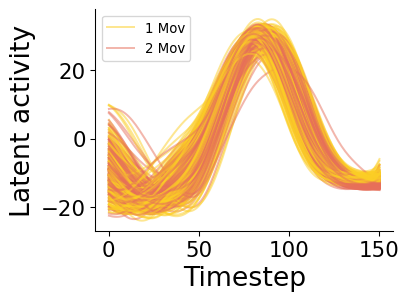

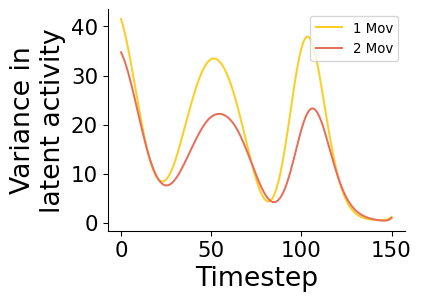

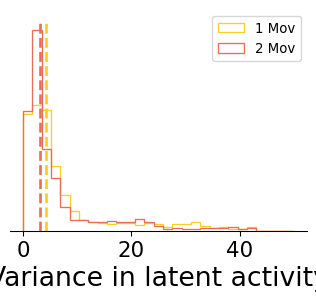

In [6]:
i = 1 #PC 

#latent activity for example PC, all trials
plt.figure()
for j in range(len(pca1)):
    plt.plot(pca1[j][:,i], c = Constants.REPERTOIRE_COLORS[0], alpha = 0.5)
    plt.plot(pca2[j][:,i], c = Constants.REPERTOIRE_COLORS[1], alpha = 0.5)
plt.xlabel('Timestep')
plt.ylabel('Latent activity')
plt.legend(['1 Mov', '2 Mov'])
plt.savefig(SUBFIG_DIR + 'latent_activity_ex_pc.pdf', format = 'pdf', bbox_inches = 'tight')


#variance in latent activity for example PC over trials
plt.figure()
plt.plot(var_pca1[:,i],c = Constants.REPERTOIRE_COLORS[0])
plt.plot(var_pca2[:,i],c = Constants.REPERTOIRE_COLORS[1])
plt.xlabel('Timestep')
plt.ylabel("\n".join(wrap('Variance in latent activity',15)))
plt.legend(['1 Mov', '2 Mov'])
plt.savefig(SUBFIG_DIR + 'latent_activity_ex_var.pdf', format = 'pdf', bbox_inches = 'tight')


#var histogram
plt.figure()
bins = np.linspace(0, 50,30)
plt.hist(var_pca1.flatten(), histtype='step', bins = bins, color = Constants.REPERTOIRE_COLORS[0])
plt.hist(var_pca2.flatten(), histtype='step', bins = bins, color = Constants.REPERTOIRE_COLORS[1])
plt.xlabel('Variance in latent activity')
ymin, ymax = plt.gca().get_ylim()
# plt.vlines([np.mean(var_pca1.flatten())], 0, ymax, color = Constants.REPERTOIRE_COLORS[0], linestyles = ['solid'])
plt.vlines([np.median(var_pca1.flatten())], 0, ymax, color = Constants.REPERTOIRE_COLORS[0], linestyles = ['dashed'], linewidth = 2)
# plt.vlines([np.mean(var_pca2.flatten())], 0, ymax, color = Constants.REPERTOIRE_COLORS[1], linestyles = ['solid'])
plt.vlines([np.median(var_pca2.flatten())], 0, ymax, color = Constants.REPERTOIRE_COLORS[1], linestyles = ['dashed'], linewidth = 2)
# plt.legend(['1 Mov', '2 Mov', 'median', 'mean'])
plt.legend(['1 Mov', '2 Mov'])
plt.gca().spines['left'].set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig(SUBFIG_DIR + 'latent_activity_ex_hist.pdf', format = 'pdf', bbox_inches = 'tight')




### Position

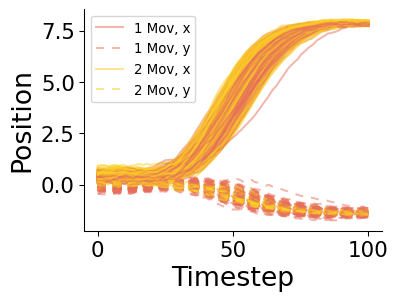

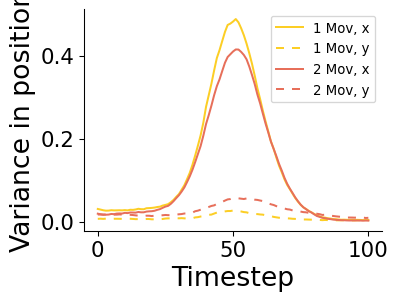

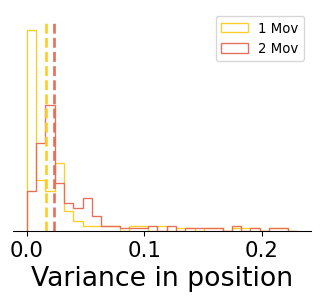

In [7]:
#position, all trials
plt.figure()
for j in range(len(pos1)):
    plt.plot(pos2[j][:,0], color = Constants.REPERTOIRE_COLORS[1], alpha = 0.5)
    plt.plot(pos2[j][:,1], color = Constants.REPERTOIRE_COLORS[1], alpha = 0.5, linestyle = (0, (4,4)))
    plt.plot(pos1[j][:,0], color = Constants.REPERTOIRE_COLORS[0], alpha = 0.5)
    plt.plot(pos1[j][:,1], color = Constants.REPERTOIRE_COLORS[0], alpha = 0.5, linestyle = (0, (4,4)))
plt.xlabel('Timestep')
plt.ylabel('Position')
plt.legend(['1 Mov, x', '1 Mov, y', '2 Mov, x', '2 Mov, y'])
plt.savefig(SUBFIG_DIR + 'position_ex.pdf', format = 'pdf', bbox_inches = 'tight')

#var position over trials
plt.figure()
plt.plot(var_pos1[:,0], color = Constants.REPERTOIRE_COLORS[0])
plt.plot(var_pos1[:,1], color = Constants.REPERTOIRE_COLORS[0], linestyle = (0, (4,4)))
plt.plot(var_pos2[:,0], color = Constants.REPERTOIRE_COLORS[1])
plt.plot(var_pos2[:,1], color = Constants.REPERTOIRE_COLORS[1], linestyle = (0, (4,4)))
plt.xlabel('Timestep')
plt.ylabel('Variance in position')
plt.legend(['1 Mov, x', '1 Mov, y', '2 Mov, x', '2 Mov, y'])
plt.savefig(SUBFIG_DIR + 'position_ex_var.pdf', format = 'pdf', bbox_inches = 'tight')

plt.figure()
bins = np.linspace(0,0.23,30)
plt.hist(var_pos1.flatten(), histtype='step', bins = bins, color = Constants.REPERTOIRE_COLORS[0])
plt.hist(var_pos2.flatten(), histtype='step', bins = bins, color = Constants.REPERTOIRE_COLORS[1])
ymin, ymax = plt.gca().get_ylim()
# plt.vlines([np.mean(var_pos1.flatten())], 0, ymax, color = Constants.REPERTOIRE_COLORS[0], linestyles = ['solid'])
plt.vlines([np.median(var_pos1.flatten())], 0, ymax, color = Constants.REPERTOIRE_COLORS[0], linestyles = ['dashed'], linewidth = 2)
# plt.vlines([np.mean(var_pos2.flatten())], 0, ymax, color = Constants.REPERTOIRE_COLORS[1], linestyles = ['solid'])
plt.vlines([np.median(var_pos2.flatten())], 0, ymax, color = Constants.REPERTOIRE_COLORS[1], linestyles = ['dashed'], linewidth = 2)
plt.xlabel('Variance in position')
# plt.legend(['1 Mov', '2 Mov', 'mean', 'median'])
plt.legend(['1 Mov', '2 Mov'])
plt.gca().spines['left'].set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig(SUBFIG_DIR + 'position_ex_hist.pdf', format = 'pdf', bbox_inches = 'tight')
